In [94]:
import sys
import time
import os
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np
import pylab as py
import random
import pandas as pd
from matplotlib import gridspec
from scipy import polyval, polyfit
from scipy.optimize import curve_fit
from datetime import datetime
import time
import corner
import emcee
from scipy.stats import linregress
from scipy import interpolate
from scipy import polyval, polyfit
from scipy import odr
import warnings
warnings.filterwarnings('ignore')

In [95]:
####################################### Set Axes
def set_axes(ax, xlim=None, ylim=None, fontsize=16, twinx=True, twiny=True, minor=True, inout='in'):
        
        if not ylim is None:
            ax.set_ylim(ylim)
        else:
            ylim = ax.get_ylim() 
            
        if not xlim is None:    
            ax.set_xlim(xlim) 
        else:
            xlim = ax.get_xlim()
            
        ax.tick_params(which='major', length=6, width=1., direction=inout)
#         if minor:
        ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)  
        
        if twiny:
            y_ax = ax.twinx()
            y_ax.set_ylim(ylim)
            y_ax.set_yticklabels([])
            y_ax.minorticks_on()
            y_ax.tick_params(which='major', length=6, width=1., direction=inout)
            if minor:
                y_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout) 
        
        if twinx:
            x_ax = ax.twiny()
            x_ax.set_xlim(xlim)
            x_ax.set_xticklabels([])
            x_ax.minorticks_on()
            x_ax.tick_params(which='major', length=6, width=1.0, direction=inout)
            if minor:
                x_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)     

        for tick in ax.xaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        for tick in ax.yaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        
        return x_ax, y_ax

In [96]:

# len(calib['So'].join(df[["V3k", "Vmod", "Qs", "Qw", "F21", 'eF21', 'elgWi']]).dropna())

In [97]:
# df = pd.read_csv("edd_cf4_refined.csv", sep='|')
df = pd.read_csv("btfr_brent_updated.csv", sep='|')

for col in df.columns:
    newcol = col.strip()
    df.rename(columns={col:newcol}, inplace=True)

df = df.rename(columns={"e_F21":"eF21"})

df = df.set_index("PGC")
print(df.columns)
print(len(df))

df.head()

Index(['flag', 'DM_av', 'DM_riz', 'eDM_riz', 'DM_W1', 'eDM_W1', 'PGC1', 'Nest',
       'logMs_riz', 'logMs_W1', 'logM_gas', 'logMb', 'Vhel', 'Vls', 'v3k', 'f',
       'lgWmxi', 'elgWi', 'F21', 'eF21', 'inc', 'einc', 'g***', 'r***', 'i***',
       'z***', 'w1***', 'Qs', 'Qw', 'RA', 'DE', 'GLong', 'GLat', 'SGL', 'SGB',
       'Nkt', 'N15', 'SGLg', 'SGBg', 'Vhg', 'Vlsg', 'V3kg', 'fg'],
      dtype='object')
10154


,flag,DM_av,DM_riz,eDM_riz,DM_W1,eDM_W1,PGC1,Nest,logMs_riz,logMs_W1,...,SGL,SGB,Nkt,N15,SGLg,SGBg,Vhg,Vlsg,V3kg,fg
PGC,,,,,,,,,,,,,,,,,,,,,
2,1,34.54,NaN,NaN,34.54,0.28,73150,200275,NaN,10.917,...,341.6440,20.7388,0,7,341.4922,20.7395,5194,5486,4916,1.013
4,1,33.44,33.35,0.20,33.53,0.19,120,202766,9.213,9.122,...,316.0587,18.4514,0,0,316.0587,18.4514,4458,4706,4109,1.011
12,1,35.02,NaN,NaN,35.02,0.23,12,210177,NaN,10.475,...,286.4249,11.3511,0,1,286.4249,11.3510,6532,6669,6179,1.016
16,1,34.66,34.60,0.26,34.72,0.25,16,211419,10.205,10.180,...,287.6119,11.7030,0,1,287.6120,11.7030,5709,5851,5354,1.014
55,1,33.66,33.62,0.26,33.71,0.25,55,0,9.184,9.141,...,327.0996,19.7763,0,0,327.0996,19.7763,4779,5052,4454,1.012


In [98]:
gg = pd.read_csv("../calibrators/TF_calibration_parameters_bar.200527", sep='|')

for col in gg.columns:
    newcol = col.strip()
    gg.rename(columns={col:newcol}, inplace=True)

gg = gg.set_index("pgc")

df = df.join(gg[["w1_sss", "w2_sss", "mu50", "P0_w2", "c21w"]])

gg.head()

,Name,Vhel,Vls,u,g,r,i,z,w1,w2,...,Sqlt,Wqlt,u_sss,g_sss,r_sss,i_sss,z_sss,w1_sss,w2_sss,R_source
pgc,,,,,,,,,,,,,,,,,,,,,
2,UGC12889,5017.0,5309.5,0.00,0.00,0.00,0.00,0.00,11.86,12.49,...,0,5,0.00,0.00,0.00,0.00,0.00,11.89,12.52,2
4,PGC000004,4458.0,4706.1,17.57,16.43,15.91,15.57,15.42,16.06,16.42,...,5,4,16.30,15.59,15.33,15.12,15.07,16.07,16.44,2
12,PGC000012,6531.0,6667.6,0.00,0.00,0.00,0.00,0.00,13.60,14.20,...,0,5,0.00,0.00,0.00,0.00,0.00,13.59,14.23,2
16,PGC000016,5713.0,5855.1,16.08,14.83,14.21,13.86,13.61,13.98,14.67,...,5,5,15.40,14.36,13.86,13.58,13.40,13.99,14.70,2
55,UGC12898,4779.0,5052.2,16.82,16.08,15.71,15.50,15.40,16.18,16.60,...,5,4,15.94,15.53,15.32,15.22,15.17,16.20,16.63,2


In [99]:
df[["w1***", "w1_sss", "w2_sss", "mu50", "P0_w2", "c21w"]].head()

,w1***,w1_sss,w2_sss,mu50,P0_w2,c21w
PGC,,,,,,
2,11.89,11.89,12.52,22.41,2.02,3.18
4,16.07,16.07,16.44,26.12,-2.75,0.25
12,13.59,13.59,14.23,23.23,0.56,1.83
16,13.99,13.99,14.70,22.59,0.92,2.50
55,16.20,16.20,16.63,25.43,-2.83,-0.87


In [100]:
df['Vmod'] = df.fg*df.Vlsg   # df.f*df.v3k # 
df['D75'] = df.Vmod / 75.
df['logD75'] = np.log10(df.D75)
df['DM_75'] = 5*df.logD75 + 25 
df['Mg_75'] = df['g***'] - df.DM_75
df['Mr_75'] = df['r***'] - df.DM_75
df['Mi_75'] = df['i***'] - df.DM_75
df['Mz_75'] = df['z***'] - df.DM_75
df['M1_75'] = np.asarray([np.float64(x) for x in df['w1***'].values]) - df.DM_75.values

df['gi'] = df['g***'] - df['i***']
df['iw1'] = df['i***'] - df['w1***']

In [101]:
len(df)

10154

In [102]:
df_alfa = pd.read_csv("ALFALFA.csv", sep='|')
for col in df.columns:
    newcol = col.strip()
    df.rename(columns={col:newcol}, inplace=True)

df_alfa = df_alfa.set_index("PGC")
df_alfa = df_alfa[["F", "e_F"]]
df_alfa.head()

,F,e_F
PGC,,
4,1.96,0.07
6,1.13,0.09
10,2.47,0.06
20,2.30,0.11
28,2.49,0.11


In [103]:
df_adhi = pd.read_csv("ADHI.csv", sep='|')
for col in df.columns:
    newcol = col.strip()
    df.rename(columns={col:newcol}, inplace=True)
df_adhi = df_adhi.set_index("PGC")
df_adhi = df_adhi[["Flux"]]

df_adhi.head()

,Flux
PGC,
2,4.73
4,1.85
6,NaN
12,3.40
16,1.19


In [104]:
df = df.join(df_alfa, how='left')
df = df.join(df_adhi, how='left')

df = df.rename(columns={"Vls":"V3k"})

df.head()

,flag,DM_av,DM_riz,eDM_riz,DM_W1,eDM_W1,PGC1,Nest,logMs_riz,logMs_W1,...,Mg_75,Mr_75,Mi_75,Mz_75,M1_75,gi,iw1,F,e_F,Flux
PGC,,,,,,,,,,,,,,,,,,,,,
2,1,34.54,NaN,NaN,34.54,0.28,73150,200275,NaN,10.917,...,NaN,NaN,NaN,NaN,-22.459020,NaN,NaN,NaN,NaN,4.73
4,1,33.44,33.35,0.20,33.53,0.19,120,202766,9.213,9.122,...,-18.421709,-18.681709,-18.891709,-18.941709,-17.941709,0.47,-0.95,1.96,0.07,1.85
12,1,35.02,NaN,NaN,35.02,0.23,12,210177,NaN,10.475,...,NaN,NaN,NaN,NaN,-21.189466,NaN,NaN,NaN,NaN,3.40
16,1,34.66,34.60,0.26,34.72,0.25,16,211419,10.205,10.180,...,-20.131034,-20.631034,-20.911034,-21.091034,-20.501034,0.78,-0.41,NaN,NaN,1.19
55,1,33.66,33.62,0.26,33.71,0.25,55,0,9.184,9.141,...,-18.637913,-18.847913,-18.947913,-18.997913,-17.967913,0.31,-0.98,NaN,NaN,4.30


In [105]:
df['F21_av'] = df[["F", "Flux"]].mean(axis=1)

dg = df[["F21", "eF21", "F", "e_F", "Flux", "F21_av"]]
dg['F21_'] = dg.apply(lambda X: X.F21_av if ~np.isnan(X.F21_av) else X.F21, axis=1)
dg['F21_e'] = dg.apply(lambda X: X.e_F if ~np.isnan(X.F) else X.eF21, axis=1)


adhi_list = [5072, 9670, 49734, 51401, 1737674, 3091777, 5807477]
dg.loc[adhi_list]['F21_'] = dg.loc[adhi_list].Flux   # using ADHI HI flux values


len(dg)

df["F21"] = dg.F21_
df["eF21"] = dg.F21_e

df['Mass_HI'] = 2.356E5 * df.F21 * (df.D75**2)

In [106]:
len(df)

10154

In [107]:
new_drop = pd.read_csv("drop_january2021.bar", sep='|')



df = df.drop(new_drop.PGC.values, errors='ignore')

len(df)

10154

In [109]:
new_drop.PGC

0          185
1          226
2          356
3          652
4          742
        ...   
724    5808735
725    5808751
726    5808763
727    5952398
728    6656993
Name: PGC, Length: 729, dtype: int64

In [82]:
def linear(x, m, b):
    return m*x+b

def linear_m(x, m):
    return m*x

In [83]:
# alfa = 0.436
# beta = 1.577
def malmquister(df, alfa, beta):
    df['logMs_i'] = beta + alfa*df.gi - 0.4*df['Mi_75']
    df['Ms_i'] = 10**df.logMs_i
    df["logMs_av"] = df["logMs_i"]


    dff = df[(df.Qs>2)&(df.elgWi>0)&(df.lgWmxi>0)&(df.Mass_HI>0)]
    X0 = dff.lgWmxi.values
    Y0 = dff.logMs_av.values-np.log10(dff.Mass_HI.values)
    V3k = dff.V3k.values


    x = np.linspace(2.2, 2.9, 100)
    ind, = np.where((X0>2.2)&(dff.V3k>0)&(dff.V3k<2000)&(X0<2.9))
    fit, cov = curve_fit(linear, X0[ind], Y0[ind])
    m, b = fit[0], fit[1]


    Y = Y0-(m*X0+b)
    X = V3k
    X = X[X0>2.2]
    Y = Y[X0>2.2]
    x = np.linspace(0,20000,1000)
    fit, cov = curve_fit(linear_m, X[(X>4000)&(X<10000)], Y[(X>4000)&(X<10000)])
    mc = fit[0]
    
    return m, b, mc

In [84]:
malmquister(df, 0.436, 1.577)
# (2.3864461031893835, -5.115425138587878, -5.515999981217281e-05)

(2.2863503609408555, -4.848541577004984, -5.86668507534095e-05)

In [85]:
len(df)

10154

In [86]:
def HI_corrector(mc, V3k):
    return mc*V3k

In [87]:
def Chi2(theta):
    
    alpha = theta[0]
    beta = theta[1]
    slope = theta[2]
    zp = theta[3]
    
    m, b, mc = malmquister(df, alpha, beta)
    
    ###########################################################
    df['Mb'] = df.Ms_i + 1.33*(10**(np.log10(df.Mass_HI)+HI_corrector(mc, df.V3k.values)))
    df['logMb'] = np.log10(df.Mb.values)
    
    dff = df[(df.Qs>2)&(df.elgWi>0)&(df.lgWmxi>0)&(df.V3k>4000)]
    dff = dff[["lgWmxi","elgWi","logMb"]].dropna()
    
    logW = dff.lgWmxi.values
    logWe = dff.elgWi.values
    logMass = dff.logMb.values
    
    logW_p = (logMass-zp)/slope+2.5
        
    chi2 = (logW-logW_p)**2/logWe**2
    
    return np.nansum(chi2)


def lnlike(theta):
    
    xi2 = Chi2(theta)
    
    return -0.5*xi2


def lnprior(theta):
    
    if theta[0]<0:
        return -np.inf
    if theta[2]>0 and theta[2]<10:   # slope
            if theta[3]>0 and theta[3]<20: # zp
                return 0

    return -np.inf


def lnprob(theta):
    
    lp = lnprior(theta)
    if not np.isfinite(lp) :
        return -np.inf    
    return lp + lnlike(theta)

In [19]:
t1 =  datetime.now()
###########################################

ndim, nwalkers = 4, 24

p0 = [np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob)

sampler.reset()
sampler.run_mcmc(p0, 2000)

###########################################
t2 =  datetime.now()
print("Execution time:")
print(t2-t1)

Execution time:
0:14:27.580623


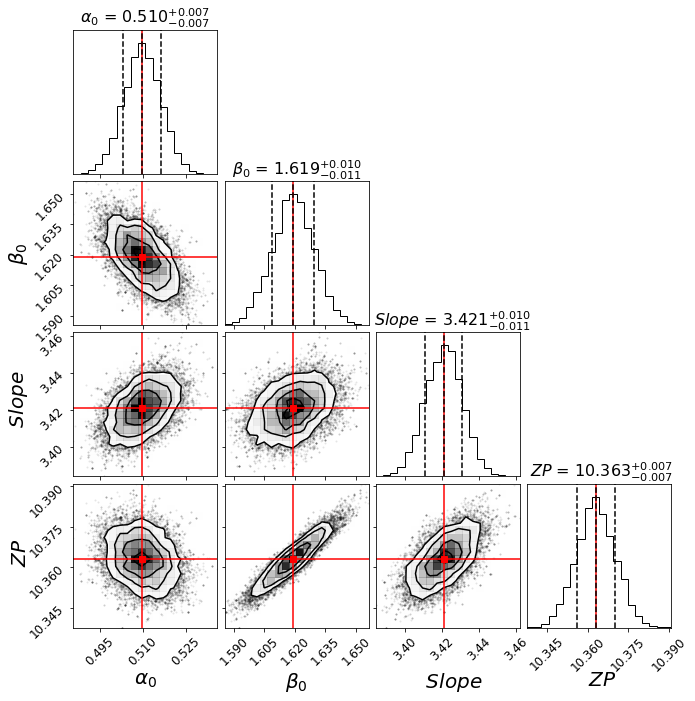

In [20]:


samples = sampler.chain[:, 1000:, :].reshape((-1, ndim))

samples_ = samples

samples_ = samples_[np.where(samples_[:,0]>0)]

# samples_ = samples_[(samples_[:,1]>-1)&(samples_[:,1]<1.31)]
# samples_ = samples_[np.where(samples_[:,2]>4)]
# samples_ = samples_[np.where(samples_[:,3]<10.152)]


# samples_[:,1] -= 0.4*4.58

theta = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                            zip(*np.percentile(samples_, 
                            [16, 50, 84],
                            axis=0)))

labels = [r"$\alpha_0$", r"$\beta_0$", r"$\/\/\/\/Slope$", r"$\/\/ZP$"]
# labels = [r"$\alpha_0$", r"$\/\/\/\/Slope$", r"$\/\/ZP$"]

truths=[t[0] for t in theta]
fig = corner.corner(samples_, truth_color='r', labels=labels,
                    truths=truths, 
                    quantiles=[0.16, 0.5, 0.84], 
                    show_titles=True, 
                    title_kwargs={"fontsize": 16}, 
                    title_fmt=".3f")


for ax in fig.get_axes():
    ax.tick_params(axis='both', labelsize=12)
    
    lbl = ax.xaxis.get_label()
    lbl.set_fontsize(20)
    txt = lbl.get_text().strip()
    lbl.set_text(txt)
    lbl.set_linespacing(20)
    lbl = ax.yaxis.get_label()
    lbl.set_fontsize(20)
    txt = lbl.get_text().strip()
    lbl.set_text(txt)



In [88]:
len(df)

10154

5152

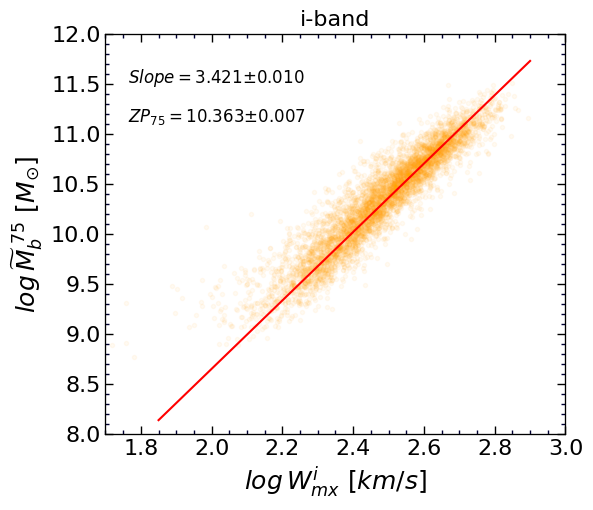

In [115]:
alfa = 0.510
beta = 1.619
m0 = 3.421
dm0 = 0.010
b0 = 10.363
db0 = 0.007
m, b, mc = malmquister(df, alfa, beta)

df['logMs_i'] = beta + alfa*df.gi - 0.4*df['Mi_75']
df['Ms_i'] = 10**df.logMs_i
df['Mb'] = df.Ms_i + 1.33*(10**(np.log10(df.Mass_HI)+HI_corrector(mc, df.V3k.values)))
df['logMb'] = np.log10(df.Mb.values)
    
fig = py.figure(figsize=(5, 5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(1,1) ; p=0
ax = plt.subplot(gs[p]) ; p+=1

dff = df[(df.Qs>2)&(df.elgWi>0)&(df.lgWmxi>0)&(df.V3k>4000)]#.dropna()

logW = dff.lgWmxi.values
logMass = np.log10(dff.Mb.values)

ax.plot(logW, logMass, '.', color='orange', alpha=0.05) 
# ax.plot(logW, logMass, 'ko', alpha=0.6, ms=1.2, mfc='orange', mec='none') 


w = np.linspace(1.85,2.9,100)
M = m0*(w-2.5) + b0

ax.plot(w, M, 'r-')


ax.set_title("i-band", fontsize=16)


Ylm = ax.get_ylim() ; Xlm = ax.get_xlim()
x0 = 0.85*Xlm[0]+0.15*Xlm[1]
y0 = 0.1*Ylm[0]+0.9*Ylm[1]
ax.text(x0,y0, r"$Slope = $"+"%.3f" % m0+'$\pm$'+"%.3f" % dm0, fontsize=12, color='k')
y0 = 0.2*Ylm[0]+0.8*Ylm[1]
ax.text(x0,y0, r"$ZP_{75} = $"+"%.3f" % b0+'$\pm$'+"%.3f" % db0, fontsize=12, color='k')



ax.set_xlabel(r'$log \/ W_{mx}^i \/\/[km/s]$', fontsize=18) 
ax.set_ylabel(r'$log \/ \widetilde{M}_b^{\/\/75} \/\/ [M_{\odot}]$', fontsize=18)
set_axes(ax, (1.7,3), (8,12))

len(logW)

In [21]:
malmquister(df, 0.541, 1.603)

(2.403401200548313, -5.0404298531728315, -6.010017741586715e-05)

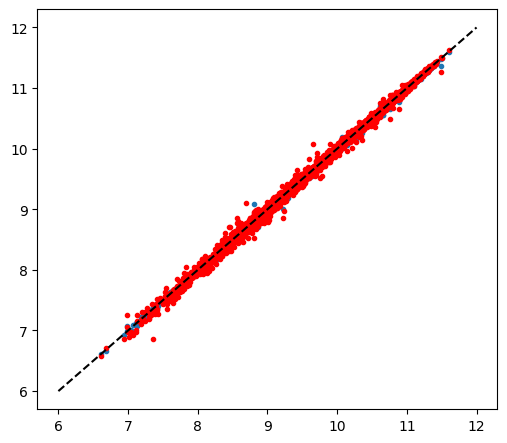

In [28]:
fig = py.figure(figsize=(5, 5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(1,1) ; p=0
ax = plt.subplot(gs[p]) ; p+=1

df['logMs_i']  = 1.619 + 0.510*df.gi - 0.4*df['Mi_75']
df['logMs_r']  = 1.618 + 0.649*df.gi - 0.4*df['Mr_75']
df['logMs_r']  = 1.618 + 0.649*df.gi - 0.4*df['Mr_75']


# df['logMs_i2'] = 2.404 + 0.101*df.iw1 - 0.4*df['Mi_75']
# df['logMs_w1'] = 1.928 + 0.035*df.mu50 - 0.4*df['M1_75']

ax.plot(df.logMs_i.values, df.logMs_r.values, '.')
ax.plot(df.logMs_i.values, df.logMs_z.values, 'r.')
ax.plot(df.logMs_i.values, df.logMs_w1.values, 'g.')

ax.plot([6,12],[6,12], 'k--')

(-0.2141500000000005, 0.6107310534894981)

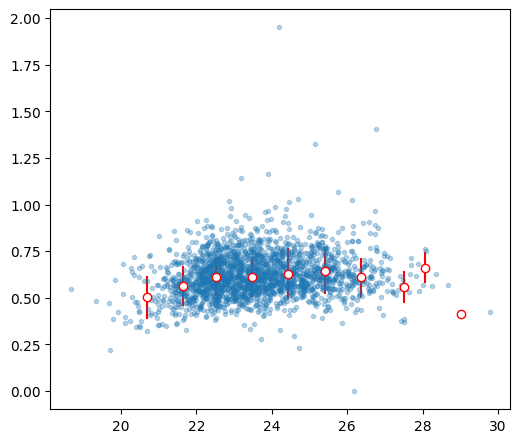

In [43]:
df['MtoL_w1']  = 1.619 + 0.510*df.gi - 0.4*df['Mi_75'] + 0.4*df['M1_75'] - (0.4*5.91) 

fig = py.figure(figsize=(5, 5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(1,1) ; p=0
ax = plt.subplot(gs[p]) ; p+=1

ax.plot(df.mu50.values, 10**df.MtoL_w1.values, '.', alpha=0.3)
# ax.set_ylim(1,3)

X = df.dropna().mu50.values
Y = 10**df.dropna().MtoL_w1.values

for i in np.arange(20,30 , 1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        
        
        xp = np.asarray(xp)
        yp = np.asarray(yp)
        
        Q1 = np.quantile(xp, 0.005)
        Q3 = np.quantile(xp, 0.995)
        
        
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), fmt='o', 
                    color='red', ms=6, mfc='white') 


np.median(df.dropna().MtoL_w1.values), np.median(10**df.dropna().MtoL_w1.values)

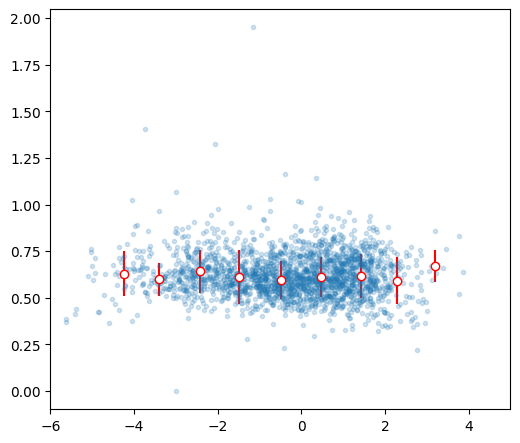

In [38]:
fig = py.figure(figsize=(5, 5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(1,1) ; p=0
ax = plt.subplot(gs[p]) ; p+=1

ax.plot(df.P0_w2.values, 10**df.MtoL_w1.values, '.', alpha=0.2)
# ax.set_ylim(-1,0.5)
ax.set_xlim(-6,5)


X = df.dropna().P0_w2.values
Y = 10**df.dropna().MtoL_w1.values

for i in np.arange(-5, 4 ,1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        
        
        xp = np.asarray(xp)
        yp = np.asarray(yp)
        
        Q1 = np.quantile(xp, 0.005)
        Q3 = np.quantile(xp, 0.995)
        
        
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), fmt='o', 
                    color='red', ms=6, mfc='white') 

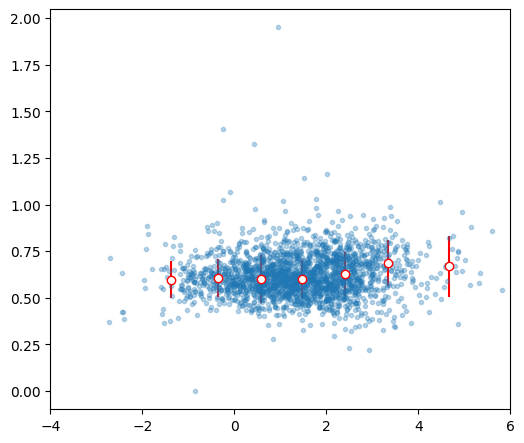

In [40]:
fig = py.figure(figsize=(5, 5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(1,1) ; p=0
ax = plt.subplot(gs[p]) ; p+=1

ax.plot(df.c21w.values, 10**df.MtoL_w1.values, '.', alpha=0.3)
# ax.set_ylim(-1,0.5)
ax.set_xlim(-4,6)

X = df.dropna().c21w.values
Y = 10**df.dropna().MtoL_w1.values

for i in np.arange(-2,5 ,1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        
        
        xp = np.asarray(xp)
        yp = np.asarray(yp)
        
        Q1 = np.quantile(xp, 0.005)
        Q3 = np.quantile(xp, 0.995)
        
        
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), fmt='o', 
                    color='red', ms=6, mfc='white') 

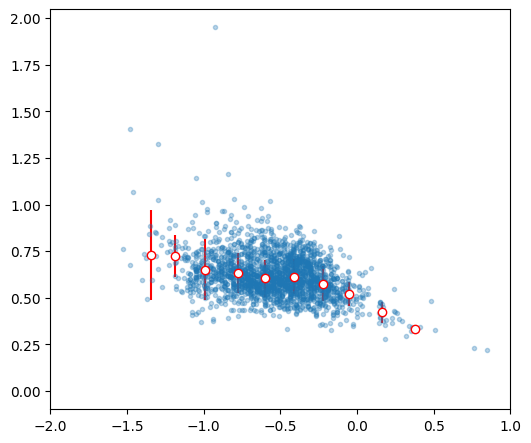

In [42]:
fig = py.figure(figsize=(5, 5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(1,1) ; p=0
ax = plt.subplot(gs[p]) ; p+=1

ax.plot(df.iw1.values, 10**df.MtoL_w1.values, '.', alpha=0.3)
# ax.set_ylim(-1,0.5)
ax.set_xlim(-2,1)

X = df.dropna().iw1.values
Y = 10**df.dropna().MtoL_w1.values

for i in np.arange(-1.5, 0.5 , 0.2):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.2:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        
        
        xp = np.asarray(xp)
        yp = np.asarray(yp)
        
        Q1 = np.quantile(xp, 0.005)
        Q3 = np.quantile(xp, 0.995)
        
        
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), fmt='o', 
                    color='red', ms=6, mfc='white') 

(-1.5, 0.5)

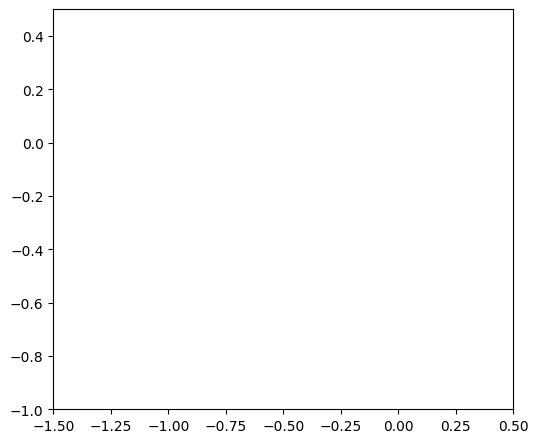

In [27]:
df['w12'] = df['w1***'] - df['w2_sss']

fig = py.figure(figsize=(5, 5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(1,1) ; p=0
ax = plt.subplot(gs[p]) ; p+=1

ax.plot(df.w12.values, df.MtoL_w1.values, '.', alpha=0.2)
ax.set_ylim(-1,0.5)
ax.set_xlim(-1.5,0.5)